dataset Facial Expression Recognition on Kaggel

modification fer2013 dataset
"https://drive.google.com/file/d/1cebjM5HymQaQVycZCcC9LDryjlQA7-vF/view?usp=sharing"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile,os
local_zip = '/content/drive/MyDrive/dataset/fer2013_5exp_modif.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow
import seaborn as sns
from matplotlib import pyplot
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, BatchNormalization, Activation
from keras.callbacks import Callback
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [ ]:
direktori_train ='/content/fer2013_5exp_modif/train'
direktori_test ='/content/fer2013_5exp_modif/test'

In [ ]:
img_size = (48,48)
batch_size = 8
split = 0.1
nb_epochs = 90
lr = 0.0001

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, 
                                   validation_split= split,# set validation split
                                   rotation_range =15,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.15,
                                   zoom_range=0.15,
                                   horizontal_flip=True) 

train_set = image_generator.flow_from_directory(direktori_train,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    subset='training') # set as training data

validation_set = image_generator.flow_from_directory(direktori_train, # same directory as training data
                                                         target_size=img_size,
                                                         batch_size=batch_size,
                                                         shuffle=False,
                                                         class_mode='categorical',
                                                         color_mode = 'grayscale',
                                                         subset='validation') # set as validation data

image_generator2 = ImageDataGenerator(rescale=1./255)

test_set = image_generator2.flow_from_directory(direktori_test,
                                                target_size=img_size,
                                                shuffle=False,
                                                class_mode='categorical',
                                                color_mode = 'grayscale') # set as test data

Found 19371 images belonging to 5 classes.
Found 2150 images belonging to 5 classes.
Found 2388 images belonging to 5 classes.


In [ ]:
from keras import activations
# Initialising the CNN Alexnet Architecture
model = Sequential(name = 'AlexNetModification')

model.add(Conv2D(96,(11,11), input_shape=(48, 48, 1), name='conv2d_1'))
model.add(Activation('relu'))
model.add(BatchNormalization(name='batchnorm_1'))
model.add(MaxPooling2D(pool_size=2,strides=2,name='maxpool2d_1'))
model.add(Dropout(0.3, name='dropout_1'))

model.add(Conv2D(256,(5,5),padding='same',name='conv2d_2'))
model.add(Activation('relu'))
model.add(BatchNormalization(name='batchnorm_2'))
model.add(MaxPooling2D(pool_size=2,strides=2,name='maxpool2d_2'))
model.add(Dropout(0.3 ,name='dropout_2'))

model.add(Conv2D(384,(3,3),padding='same',name='conv2d_3'))
model.add(Activation('relu'))
model.add(BatchNormalization(name='batchnorm_3'))

model.add(Conv2D(384,(3,3),padding='same',name='conv2d_4'))
model.add(Activation('relu'))
model.add(BatchNormalization(name='batchnorm_4'))

model.add(Conv2D(256,(3,3),padding='same',name='conv2d_5'))
model.add(Activation('relu'))
model.add(BatchNormalization(name='batchnorm_5'))
model.add(MaxPooling2D(pool_size=2,strides=2,name='maxpool2d_3'))
model.add(Dropout(0.3 ,name='dropout_3'))

model.add(Flatten(name='flatten'))

model.add(Dense(4096, activation='relu',name='dense_1'))
model.add(Dropout(0.3 ,name='dropout_4'))
model.add(Dense(4096, activation='relu',name='dense_2'))
model.add(Dropout(0.3 ,name='dropout_5'))

model.add(Dense(5, activation='softmax',name='out_layer'))

print(model.summary())

opt = optimizers.Adam(learning_rate=lr)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "AlexNetModFinal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 38, 38, 96)        11712     
                                                                 
 activation (Activation)     (None, 38, 38, 96)        0         
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 38, 38, 96)       384       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 19, 19, 96)        0         
                                                                 
 dropout_1 (Dropout)         (None, 19, 19, 96)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 256)       614656    
                                                   

In [ ]:
from keras.callbacks import ModelCheckpoint 

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelpengujiantest/test1.h5",
                             monitor='val_accuracy', 
                             verbose=2,
                             save_best_only=True, 
                             mode='max')

In [ ]:
history = model.fit(train_set,
                    steps_per_epoch = train_set.samples // batch_size,
                    validation_data = validation_set, 
                    validation_steps = validation_set.samples // batch_size,
                    epochs = nb_epoch,
                    callbacks=checkpoint)

Epoch 1/90
2421/2421 [==============================] - ETA: 0s - loss: 1.5956 - accuracy: 0.3638
Epoch 1: val_accuracy improved from -inf to 0.42257, saving model to /content/drive/MyDrive/modelpengujiantest/test1.h5
2421/2421 [==============================] - 68s 23ms/step - loss: 1.5956 - accuracy: 0.3638 - val_loss: 1.3268 - val_accuracy: 0.4226
Epoch 2/90
2419/2421 [============================>.] - ETA: 0s - loss: 1.3125 - accuracy: 0.4414
Epoch 2: val_accuracy improved from 0.42257 to 0.44403, saving model to /content/drive/MyDrive/modelpengujiantest/test1.h5
2421/2421 [==============================] - 56s 23ms/step - loss: 1.3126 - accuracy: 0.4414 - val_loss: 1.2880 - val_accuracy: 0.4440
Epoch 3/90
2421/2421 [==============================] - ETA: 0s - loss: 1.2278 - accuracy: 0.4983
Epoch 3: val_accuracy did not improve from 0.44403
2421/2421 [==============================] - 51s 21ms/step - loss: 1.2278 - accuracy: 0.4983 - val_loss: 1.2970 - val_accuracy: 0.4090
Epoch 4

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/modelpengujiantest/test1.h5')

In [ ]:
history = model.fit(train_set,
                    steps_per_epoch = train_set.samples // batch_size,
                    validation_data = validation_set, 
                    validation_steps = validation_set.samples // batch_size,
                    epochs = 10,
                    callbacks=checkpoint)

Epoch 1/10
2421/2421 [==============================] - ETA: 0s - loss: 0.4678 - accuracy: 0.8300
Epoch 1: val_accuracy improved from -inf to 0.79058, saving model to /content/drive/MyDrive/modelpengujiantest/test1.h5
2421/2421 [==============================] - 56s 22ms/step - loss: 0.4678 - accuracy: 0.8300 - val_loss: 0.6657 - val_accuracy: 0.7906
Epoch 2/10
2420/2421 [============================>.] - ETA: 0s - loss: 0.4646 - accuracy: 0.8298
Epoch 2: val_accuracy did not improve from 0.79058
2421/2421 [==============================] - 51s 21ms/step - loss: 0.4646 - accuracy: 0.8298 - val_loss: 0.6274 - val_accuracy: 0.7840
Epoch 3/10
2419/2421 [============================>.] - ETA: 0s - loss: 0.4660 - accuracy: 0.8335
Epoch 3: val_accuracy did not improve from 0.79058
2421/2421 [==============================] - 51s 21ms/step - loss: 0.4661 - accuracy: 0.8334 - val_loss: 0.6223 - val_accuracy: 0.7845
Epoch 4/10
2421/2421 [==============================] - ETA: 0s - loss: 0.4578 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

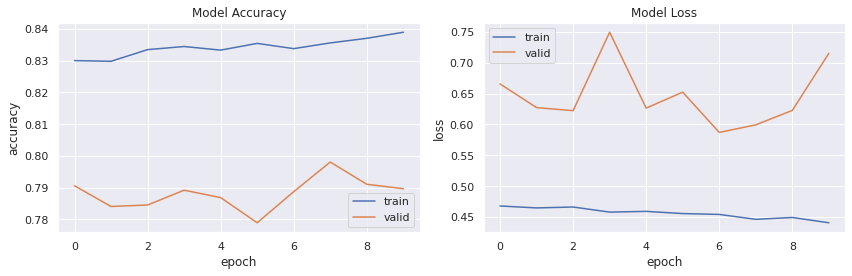

In [ ]:
sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label='train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label='valid')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.title('Model Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.title('Model Loss')
pyplot.tight_layout()

pyplot.show()

In [ ]:
Y_pred = model.predict(test_set)

In [ ]:
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
kategori= sorted(os.listdir(direktori_test))
print(f'total wrong validation predictions: {np.sum(test_set.classes != y_pred)}\n\n')
print(classification_report(test_set.classes,y_pred))

total wrong validation predictions: 400


              precision    recall  f1-score   support

           0       0.75      0.72      0.74       454
           1       0.73      0.65      0.69        54
           2       0.91      0.90      0.90       882
           3       0.77      0.81      0.79       607
           4       0.85      0.87      0.86       391

    accuracy                           0.83      2388
   macro avg       0.80      0.79      0.80      2388
weighted avg       0.83      0.83      0.83      2388



Text(0.5, 1.0, 'Normalized Confusion Matrix')

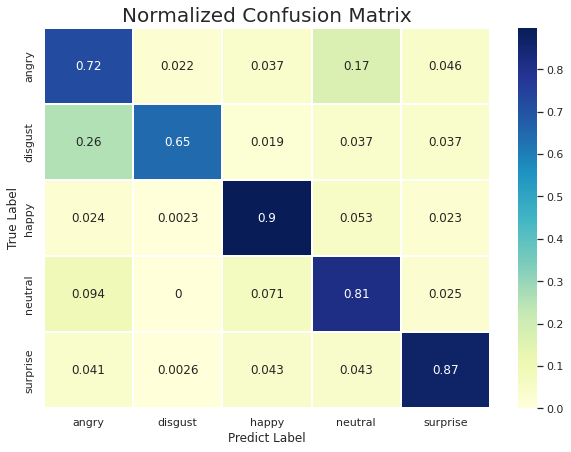

In [ ]:
cf_matrix = confusion_matrix(test_set.classes, y_pred, normalize='true')
fig, ax = pyplot.subplots(figsize=(10,7))
NormalizedConfMatrix = sns.heatmap(cf_matrix, linewidths=1,
                                   annot=True, 
                                   ax=ax, 
                                   xticklabels=kategori, 
                                   yticklabels=kategori,
                                   cmap="YlGnBu")
NormalizedConfMatrix.set(xlabel='Predict Label', ylabel='True Label')
NormalizedConfMatrix.set_title("Normalized Confusion Matrix", fontsize =20)

Text(0.5, 1.0, 'Confusion Matrix')

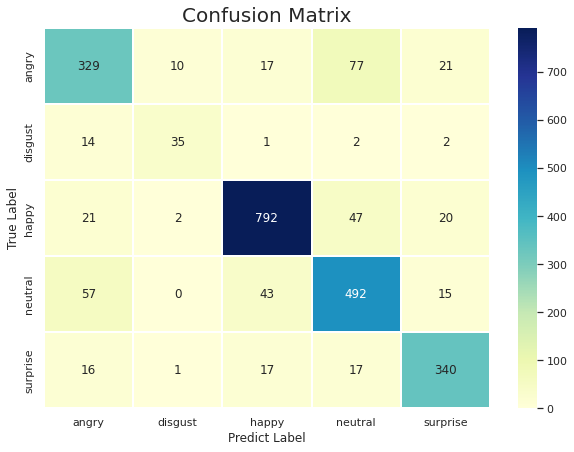

In [ ]:
cf = confusion_matrix(test_set.classes,y_pred)
fig, ax = pyplot.subplots(figsize=(10,7))
ConfMatrix = sns.heatmap(cf, linewidths=1,
                         annot=True, 
                         ax=ax, 
                         xticklabels=kategori,
                         yticklabels=kategori,fmt='d', 
                         cmap="YlGnBu")
ConfMatrix.set(xlabel='Predict Label', ylabel='True Label')
ConfMatrix.set_title("Confusion Matrix", fontsize =20)